In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
n = 100
p = 10000
n_groups = int(p/100)
alpha = 1.0
seed = 0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(n, p, n_groups).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    max_cds=int(1e5),
    newton_max_iters=10000,
)

In [7]:
pack1 = deepcopy(pack)
pack2 = deepcopy(pack)
pack3 = deepcopy(pack)

In [8]:
%%time
gl_out = group_lasso(X, pack1, fit_type='data')

CPU times: user 1.13 s, sys: 21.7 ms, total: 1.15 s
Wall time: 820 ms


In [9]:
%%time
gl_out2 = group_lasso(X, pack2, fit_type='data_newton')

CPU times: user 1.1 s, sys: 0 ns, total: 1.1 s
Wall time: 801 ms


In [10]:
A = np.asfortranarray(X.T @ X)

In [11]:
%%time
gl_out3 = group_lasso(A, pack3, fit_type='full_cov')

CPU times: user 721 ms, sys: 668 µs, total: 722 ms
Wall time: 713 ms


In [12]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2,  gl_out2['rsqs'] / np.linalg.norm(y) ** 2

(array([0.        , 0.08157866, 0.15591017, 0.22363837, 0.28534987,
        0.34157919, 0.39281335, 0.43949612, 0.48203183, 0.5207889 ,
        0.55610302, 0.58828006, 0.61759871, 0.64431291, 0.66865404,
        0.69083293, 0.71104167, 0.72945529, 0.74623326, 0.76152092,
        0.77545065, 0.78814311, 0.79970821, 0.81024613, 0.81984812,
        0.82859734, 0.83656956, 0.84383381, 0.85045301, 0.85648448,
        0.86198043, 0.86698846, 0.87155193, 0.87571034, 0.87949971,
        0.88295282, 0.88609958, 0.88896721, 0.89158054, 0.89396218,
        0.89613272, 0.89811096, 0.89991399, 0.90155741, 0.90305542,
        0.90442097, 0.90566585, 0.90680083, 0.90783568, 0.90877935,
        0.90963996, 0.91042494, 0.91114103, 0.91179441, 0.91239068,
        0.91293497, 0.91343193, 0.91388582, 0.91430053, 0.91467958,
        0.91502619, 0.91534332, 0.91563364, 0.91589959, 0.91614342,
        0.91636715, 0.91657266, 0.91676163, 0.91693562, 0.91709604,
        0.9172442 , 0.91738128, 0.91750836, 0.91

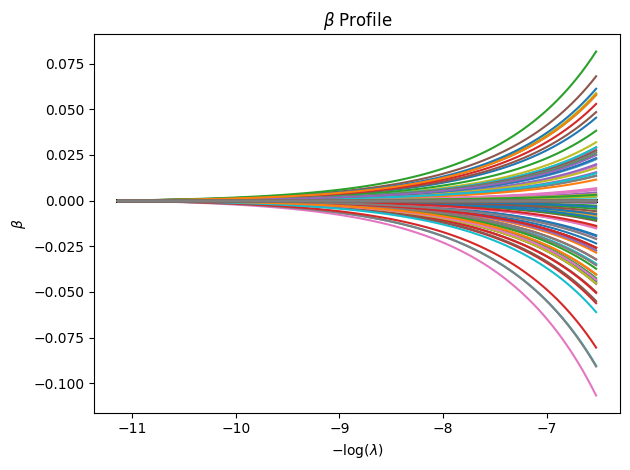

In [13]:
min_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]
max_idx = np.unravel_index(np.argmax(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == min_idx or j == max_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [14]:
np.max(gl_out['betas']-gl_out3['betas']), np.max(gl_out2['betas'] - gl_out3['betas'])

(6.938893903907228e-17, 2.3562675144361833e-09)